In [38]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_ibm_provider import IBMProvider

from qiskit_machine_learning.kernels import QuantumKernel

from qiskit_machine_learning.algorithms import QSVR

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_ibm_provider import IBMProvider

from qiskit_machine_learning.kernels import QuantumKernel

from qiskit_machine_learning.algorithms import QSVR

#---------------#

df = pd.read_csv("powerconsumption.csv")


features = df.iloc[:,0:]
labels = df.iloc[:,-1]

features.drop(['Datetime', 'PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1, inplace=True)


#---------#

features = features[0:300]
labels = labels[0:300]

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, random_state=42)

#------------#

from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [39]:
df = pd.read_csv("powerconsumption.csv")


features = df.iloc[:,0:]
labels = df.iloc[:,-1]

features.drop(['Datetime', 'PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1, inplace=True)




In [40]:
features = features[0:300]
labels = labels[0:300]

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, random_state=42)

In [41]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(240, 5)
(60, 5)
(240,)
(60,)


In [42]:
features

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,6.559,73.8,0.083,0.051,0.119
1,6.414,74.5,0.083,0.070,0.085
2,6.313,74.5,0.080,0.062,0.100
3,6.121,75.0,0.083,0.091,0.096
4,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
295,12.390,71.0,0.078,0.062,0.148
296,12.420,71.4,0.077,0.059,0.159
297,12.400,71.5,0.075,0.062,0.156
298,11.840,73.4,0.079,0.073,0.152


In [43]:
labels

0      20240.96386
1      20131.08434
2      19668.43373
3      18899.27711
4      18442.40964
          ...     
295    15498.79518
296    15146.02410
297    14972.53012
298    14943.61446
299    14862.65060
Name: PowerConsumption_Zone3, Length: 300, dtype: float64

In [44]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [45]:


from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# number of qubits is equal to the number of features
num_qubits = 5

# number of steps performed during the training procedure
tau = 1

# regularization parameter
C = 1000

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)
qkernel = FidelityQuantumKernel(feature_map=feature_map)

print("Started Training")

qsvr = QSVR(quantum_kernel=qkernel, C=C)

# training
qsvr.fit(train_features_scaled, train_labels)
print("Finished Training")

# score = qsvr.score(test_features_scaled, test_labels)
print("Started Scoring")
score_train = qsvr.score(train_features_scaled, train_labels)
score_test = qsvr.score(test_features_scaled, test_labels)
print("train: ", score_train)
print("test: ", score_test)


Started Training
Finished Training
Started Scoring
train:  0.8121731915051269
test:  0.6540340803956208


In [46]:
dict = qsvr.get_params()
qsvr_loaded = QSVR(quantum_kernel=qkernel, C=C)
qsvr_loaded.set_params(dict)

TypeError: set_params() takes 1 positional argument but 2 were given

In [7]:
# number of qubits is equal to the number of features
num_qubits = 5

# number of steps performed during the training procedure
tau = 1

# regularization parameter
C = 1000

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)
qkernel = FidelityQuantumKernel(feature_map=feature_map)

Started Training
(60, 5)
(60,)
Finished Training
Started Validating
Started Scoring
-0.180359846335018
Finished Scoring


ModuleNotFoundError: No module named 'torch'

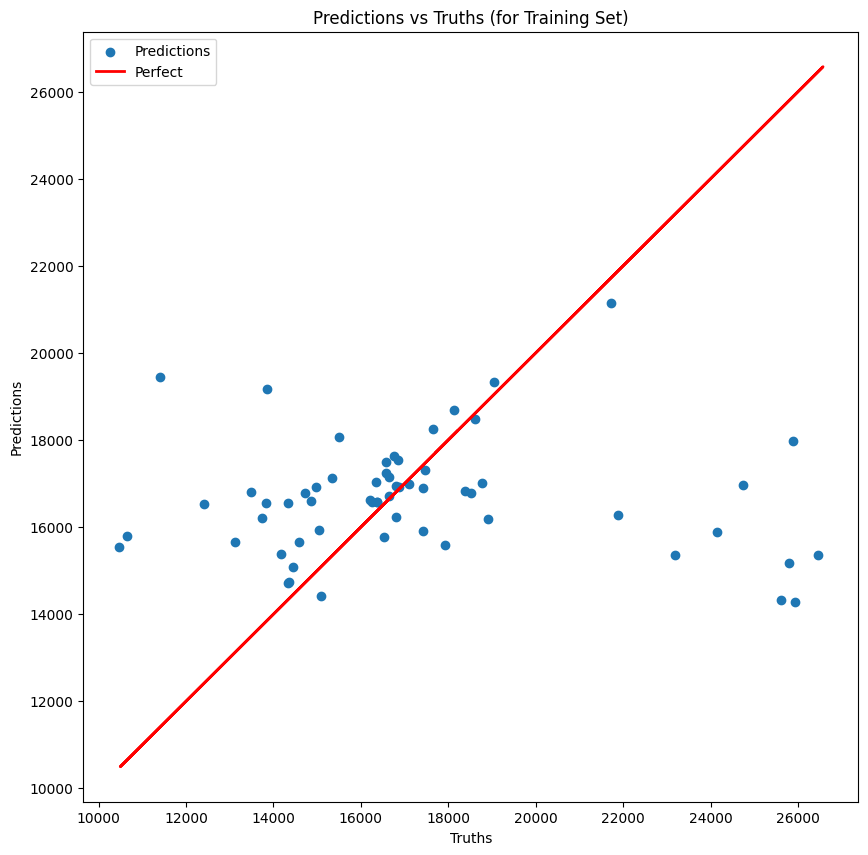

In [8]:
print("Started Training")

qsvr = QSVR(quantum_kernel=qkernel, C=C)

print(test_features.shape);
print(test_labels.shape);

# training
qsvr.fit(train_features, train_labels)
print("Finished Training")

print("Started Validating")

# score = qsvr.score(test_features, test_labels)
print("Started Scoring")
score = qsvr.score(test_features, test_labels)
print(score)
print("Finished Scoring")

predict = qsvr.predict(test_features)

import json
import torch

# Define your model and train it

# Save the model's parameters to a dictionary
model_dict = qsvr.state_dict()

# Save the dictionary to a JSON file
with open('model_params.json', 'w') as f:
    json.dump(model_dict, f)


In [ ]:
test_features

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Temperature vs. Humidity
ax.scatter(test_features['Temperature'], test_features['WindSpeed'], test_labels)

# Set axis labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Labels')
ax.set_title('Temperature vs. Humidity vs. Labels')

# Show the plot
plt.show()